In [1]:
import numpy as np
import pandas as pd
import glob
from astropy.table import Table
import matplotlib.pyplot as plt
import json 
import collections
import astropy

import astropy.units as u
from astropy.time import Time
from astropy.coordinates import SkyCoord, EarthLocation, AltAz

from astropy.io import fits
from astropy.io import ascii

In [2]:
from astroplan.plots import plot_airmass
from astroplan import Observer
from astroplan import FixedTarget
from astroplan import (AltitudeConstraint, AirmassConstraint,
                       AtNightConstraint)
from astroplan import is_observable, is_always_observable, months_observable
observer = Observer.at_site('palomar')
from astroplan import EclipsingSystem
from astropy.timeseries import LombScargle

In [3]:
lightcurve_ztf = Table.from_pandas(pd.read_csv("J204638.csv"))

In [4]:
row = lightcurve_ztf
hjd = np.array(row["mjd"])
hjd = hjd.astype("float")
hjd = hjd * u.day
mag = np.array(row["mag"])
for i in range(len(mag)):
    if(">" in str(mag[i])):
        mag[i] = mag[i][1:-1]
mag = np.asarray(mag)
mag = mag.astype("float")
mag = mag * u.mag
mag_err = np.array(row["magerr"])
mag_err = mag_err.astype("float")
mag_err = mag_err * u.mag

In [5]:
ztf_period = 0.110375275900
ztf_frequency = 1/ztf_period
ztf_frequency

9.06000000313476

In [15]:
ideal_frequency = np.linspace(10, 12, 10**6) * (1/u.day)

In [16]:
power = LombScargle(hjd, mag , mag_err).power(ideal_frequency)

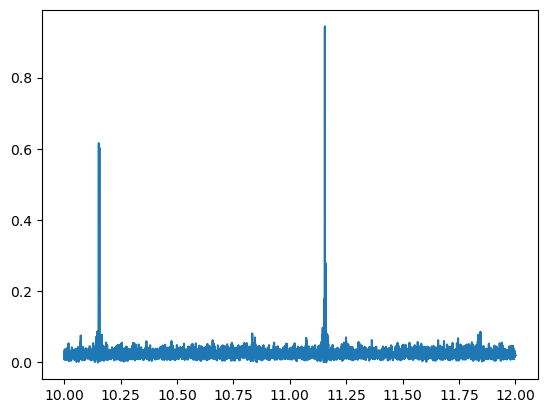

In [17]:
plt.plot(ideal_frequency, power)
#plt.vlines(ztf_frequency, 0, np.max(power), color = "red")

In [18]:
ztf_f = ideal_frequency[np.argmax(power)]
ztf_p = 1/ztf_f
ztf_p

<Quantity 0.08964277 d>

Text(0, 0.5, 'R Mag')

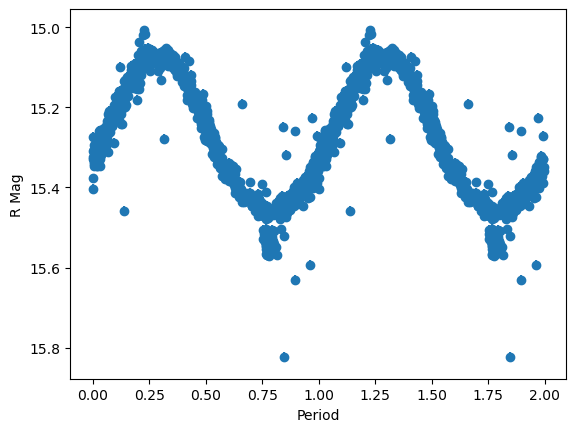

In [19]:
hjd_p_fold = hjd % ztf_p / ztf_p
hjd_p_fold = np.append(hjd_p_fold, 1 + hjd_p_fold)
mag_p_fold = np.append(mag, mag)
mag_err_p_fold = np.append(mag_err, mag_err)
plt.errorbar(hjd_p_fold, mag_p_fold, mag_err_p_fold, fmt = "o")
#plt.xlim(0.35,0.46)
#plt.ylim(15.25, 16.9)
plt.gca().invert_yaxis()

plt.xlabel("Period")
plt.ylabel("R Mag")

In [18]:
eclipsing = lightcurve_ztf[np.argmin(lightcurve_ztf["mag"])]
eclipsing

oid,expid,hjd,mjd,mag,magerr,catflags,filtercode,ra,dec,chi,sharp,filefracday,field,ccdid,qid,limitmag,magzp,magzprms,clrcoeff,clrcounc,exptime,airmass,programid
int64,int64,float64,float64,float64,float64,int64,str2,float64,float64,float64,float64,int64,int64,int64,int64,float64,float64,float64,float64,float64,float64,float64,int64
637211400028786,94418629,2458698.6897468,58698.1862963,14.6242933,0.00956679322,32768,zr,277.827451,26.9367168,0.79400003,0.0020000001,20190803185949,637,11,4,19.7800007,25.0281849,0.2093451172,0.0778823271,0.00103752629,30.0,1.04100001,3


In [24]:
primary_eclipse_time = Time(eclipsing["mjd"], format='mjd')
orbital_period = ztf_p
eclipse_duration = 0.06 * ztf_p

In [25]:
objects = EclipsingSystem(primary_eclipse_time=primary_eclipse_time,
                           orbital_period=orbital_period, duration=eclipse_duration,
                           name='J183118')

In [26]:
observing_time = Time('2023-05-05 8:00')
objects.next_primary_eclipse_time(observing_time, n_eclipses = 8)

<Time object: scale='utc' format='iso' value=['2023-05-05 12:05:31.726' '2023-05-05 23:24:49.151'
 '2023-05-06 10:44:06.577' '2023-05-06 22:03:24.002'
 '2023-05-07 09:22:41.427' '2023-05-07 20:41:58.853'
 '2023-05-08 08:01:16.278' '2023-05-08 19:20:33.704']>

In [27]:
objects.next_secondary_eclipse_time(observing_time, n_eclipses = 8)

<Time object: scale='utc' format='iso' value=['2023-05-05 17:45:10.438' '2023-05-06 05:04:27.864'
 '2023-05-06 16:23:45.289' '2023-05-07 03:43:02.715'
 '2023-05-07 15:02:20.140' '2023-05-08 02:21:37.566'
 '2023-05-08 13:40:54.991' '2023-05-09 01:00:12.416']>